# Step 1: Importing the dataset and appropriate libraries. 

Here, I am going to import the data and examine it. This will help me to determine the cleaning steps I have to take and also decide the questions I will ask.

In [1]:
""" Importing relevant libraries for data analysis """

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
%matplotlib inline

#importing the dataset

df = pd.read_csv('tmdb-movies.csv')

In [2]:
#Examining the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#checking colums and rows information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#checking number of unique objects
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [5]:
#checking number of duplicates
sum(df.duplicated())

1

In [6]:
#checking for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

# Step 2: Data Cleaning

I am going to clean the data by removing duplicates, removing rows containing null values, removing obsolete/unnecessary columns and formatting column values separated by pipe

In [7]:
#dropping the duplicate in the dataset
df.drop_duplicates(inplace = True)

In [8]:
""" Dropping unnecessary columns/coulumns not relevant to questions poised """

#imdb_id is dropped because it has null values and the id column covers the data sufficiently
#the homepage has too many null values and doesn't seem important. Overview doesn't seem important either
#revenue and budget have been replaced by revenue_adj and budget_adj respectively

df.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'overview'], axis=1, inplace=True)

In [9]:
#Null values are dropped for columns that seemed important/necessary for drawing conclusions

df.dropna(subset = ['cast', 'director', 'genres', 'production_companies'], axis = 0, inplace = True)

In [10]:
#verifying
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9772 non-null   int64  
 1   popularity            9772 non-null   float64
 2   original_title        9772 non-null   object 
 3   cast                  9772 non-null   object 
 4   director              9772 non-null   object 
 5   tagline               7635 non-null   object 
 6   keywords              8666 non-null   object 
 7   runtime               9772 non-null   int64  
 8   genres                9772 non-null   object 
 9   production_companies  9772 non-null   object 
 10  release_date          9772 non-null   object 
 11  vote_count            9772 non-null   int64  
 12  vote_average          9772 non-null   float64
 13  release_year          9772 non-null   int64  
 14  budget_adj            9772 non-null   float64
 15  revenue_adj         

# More cleaning/sorting


In [11]:
#sorting columns with values separated by pipes

def split_column(df, col):
    df['temp'] = df[col].apply(lambda x : len(x.split('|')))
    num_col = df['temp'].max()
    df.drop('temp', axis = 1, inplace = True)
    
    for i in range(1, num_col+1):
        col_name = col + " " + str(i)
        df[col_name] = np.nan
    
    for i in range(1, num_col+1):
        col_name = col + " " + str(i)
        df[col_name] = df[col].apply(lambda x : x.split('|')[i-1] if i <= len(x.split('|')) else np.nan)
        
    return df
   

In [12]:
production_companies = split_column(df, 'production_companies')
genres = split_column(df, 'genres')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9772 non-null   int64  
 1   popularity              9772 non-null   float64
 2   original_title          9772 non-null   object 
 3   cast                    9772 non-null   object 
 4   director                9772 non-null   object 
 5   tagline                 7635 non-null   object 
 6   keywords                8666 non-null   object 
 7   runtime                 9772 non-null   int64  
 8   genres                  9772 non-null   object 
 9   production_companies    9772 non-null   object 
 10  release_date            9772 non-null   object 
 11  vote_count              9772 non-null   int64  
 12  vote_average            9772 non-null   float64
 13  release_year            9772 non-null   int64  
 14  budget_adj              9772 non-null  

In [14]:
# Extracting month from release_date

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_month'] = df['release_date'].dt.month
df['release_month'] = df['release_month'].apply(lambda x: calendar.month_abbr[x])

In [15]:
#the revenue_adj and budget_adj columns have about 5022 zeros. budjet and revenue can't be zero
df['revenue_adj'].value_counts()

0.000000e+00    5022
1.438914e+07       2
1.000000e+06       2
8.990674e+07       2
8.103642e+07       2
                ... 
6.497291e+06       1
8.160074e+07       1
1.186042e+08       1
9.502000e+07       1
8.061618e+07       1
Name: revenue_adj, Length: 4742, dtype: int64

In [16]:
#Creating a copy of the dataframe with rows containing zeros for revenue_adj & budget_adj dropped
df_new = df.copy()
df_new['revenue_adj'].replace(0, np.nan, inplace = True)
df_new.dropna(subset = ['revenue_adj'], axis = 0, inplace = True)
df_new['budget_adj'].replace(0, np.nan, inplace = True)
df_new.dropna(subset = ['budget_adj'], axis = 0, inplace = True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      3805 non-null   int64         
 1   popularity              3805 non-null   float64       
 2   original_title          3805 non-null   object        
 3   cast                    3805 non-null   object        
 4   director                3805 non-null   object        
 5   tagline                 3544 non-null   object        
 6   keywords                3677 non-null   object        
 7   runtime                 3805 non-null   int64         
 8   genres                  3805 non-null   object        
 9   production_companies    3805 non-null   object        
 10  release_date            3805 non-null   datetime64[ns]
 11  vote_count              3805 non-null   int64         
 12  vote_average            3805 non-null   float64

# Step 3: Exploratory Data Analysis

The following questions are posed:
1. Do movies which cost a ton gather high popularity? 
2. What genres have the most popularity? 
3. What kinds of properties are associated with movies that have high profit? 
4. What's the relationship between vote average and popularity? 
5. Does popularity influence the revenue generated?
6. Does runtime influence popularity?
7. Has it become more expensive/cheaper to produce movies? 
8. What is the average popularity by month? Do movies release in some months have higher popularity score than others?
9. Which genres are more popular from year to year?*
10. Do newer movies have more success than old movies? *

P:S: * means question was not answered


In [17]:
#visualizing some important elements of the dataframe


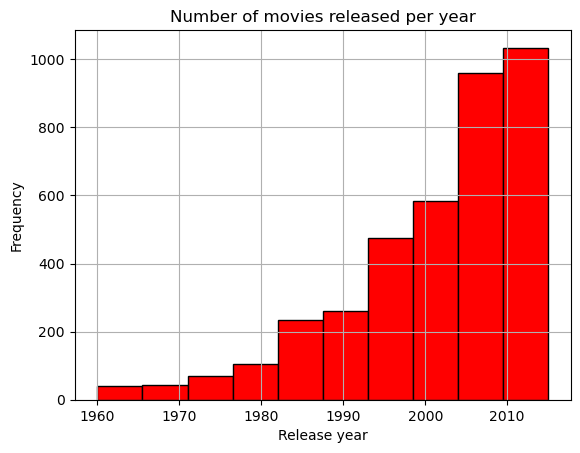

In [18]:
df_new['release_year'].hist(edgecolor='black', color ='red');
plt.title('Number of movies released per year')
plt.xlabel('Release year')
plt.ylabel('Frequency')
plt.show()
#more movies have been released in recent times

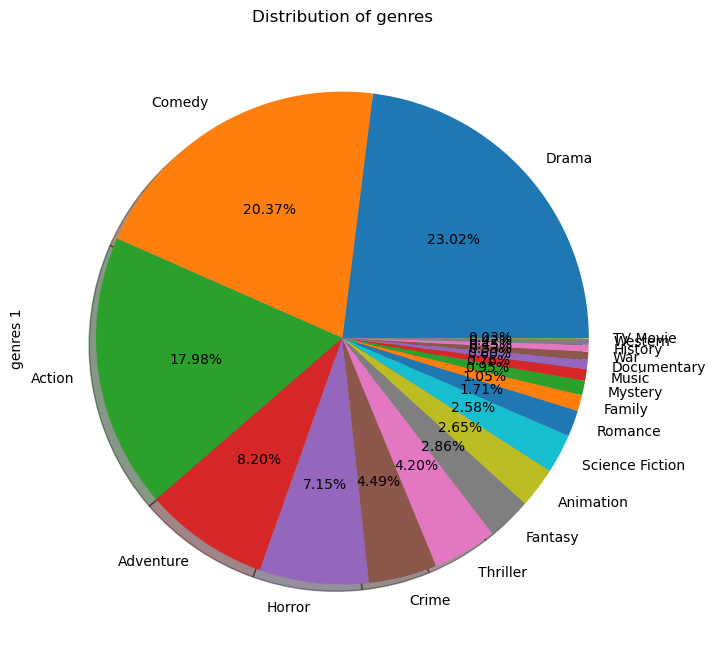

In [19]:
#distribution of genres across genre 1. Genre 1 was chosen because it has a value across board
df_new['genres 1'].value_counts().plot(kind = 'pie', figsize = (8,8), autopct='%1.2f%%',shadow=True, startangle=0)
plt.title('Distribution of genres');


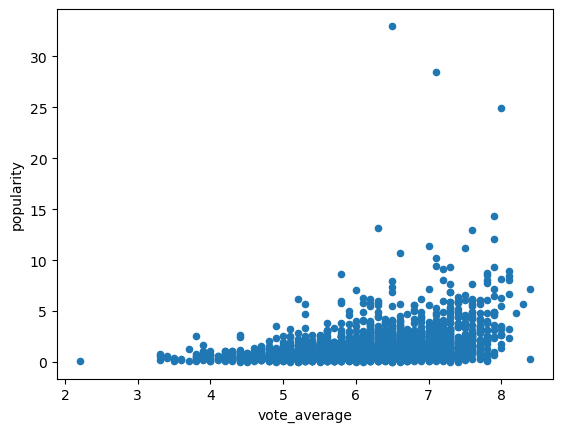

In [20]:
#correlation between vote_average and popularity ratings
df_new.plot(x= 'vote_average', y = 'popularity', kind = 'scatter');

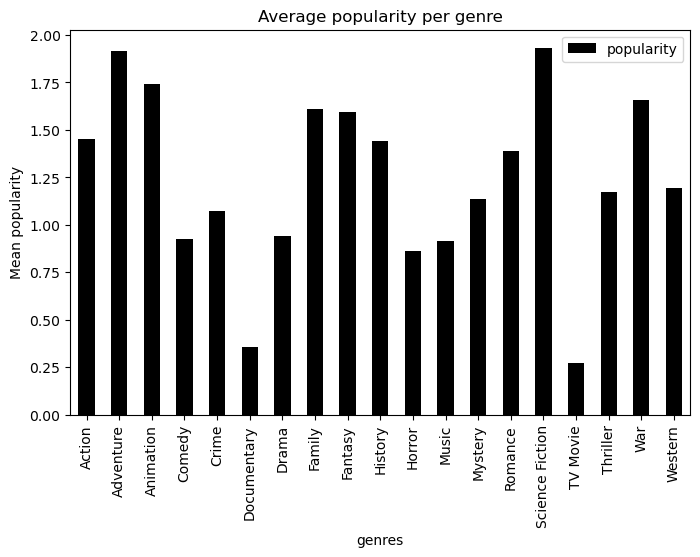

In [21]:
genre_by_popularity = df_new.groupby(['genres 1'], as_index = False)['popularity'].mean()
genre_by_popularity.plot(x='genres 1', y='popularity', kind ='bar', color ='black', figsize=(8,5))
plt.title('Average popularity per genre')
plt.xlabel('genres')
plt.ylabel('Mean popularity');


In [22]:
#are movies released in certain months more popular than those released in other months?
pop_month = df_new.groupby(['release_month'], as_index = False)['popularity'].mean()
pop_month


,release_month,popularity
0,Apr,1.023161
1,Aug,1.003299
2,Dec,1.273139
3,Feb,0.967094
4,Jan,0.984777
5,Jul,1.385146
6,Jun,1.471323
7,Mar,1.262158
8,May,1.468545
9,Nov,1.444427


In [23]:
#reordering the months
pop_month['release_month'] = pd.to_datetime(pop_month.release_month, format='%b', errors='coerce').dt.month
pop_month = pop_month.sort_values(by="release_month")
pop_month['release_month'] = pop_month ['release_month'].astype(int)
pop_month['release_month'] = pop_month['release_month'].apply(lambda x: calendar.month_abbr[x])
pop_month


,release_month,popularity
4,Jan,0.984777
3,Feb,0.967094
7,Mar,1.262158
0,Apr,1.023161
8,May,1.468545
6,Jun,1.471323
5,Jul,1.385146
1,Aug,1.003299
11,Sep,0.945997
10,Oct,1.196975


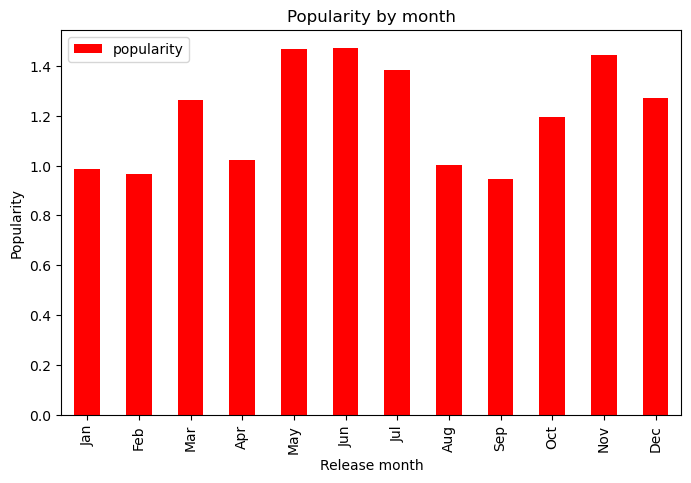

In [24]:
pop_month.plot( x = 'release_month', y = 'popularity', kind = 'bar', color = 'r', figsize = (8,5));
plt.title('Popularity by month')
plt.xlabel('Release month')
plt.ylabel('Popularity')
plt.legend()
plt.show()


In [25]:
#grouping release year by average budget and revenues. This is to check if it has become cheaper/more expensive to make movies over the years
budget_year = df_new.groupby(['release_year'], as_index = False)['budget_adj'].mean()
revenue_year = df_new.groupby(['release_year'], as_index = False)['revenue_adj'].mean()


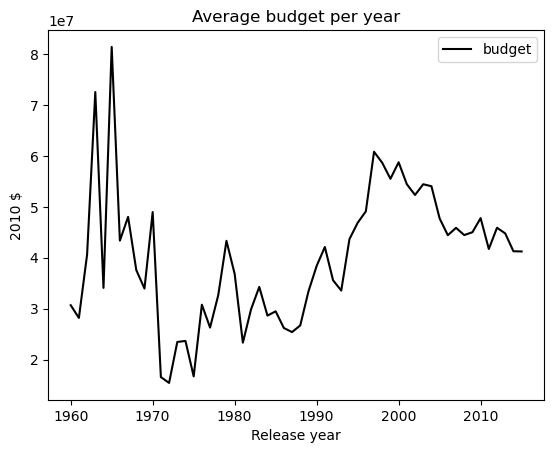

In [26]:
plt.plot(budget_year['release_year'], budget_year['budget_adj'], label = 'budget', color = 'black')
plt.title('Average budget per year')
plt.xlabel('Release year')
plt.ylabel('2010 $')
plt.legend()
plt.show()

In [27]:
#creating a column for profit made per movie
df_new ['profit_adj'] = df_new ['revenue_adj'] - df_new ['budget_adj']
df_new.head()
#verifying
df_new.info()
df_new['profit_adj'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      3805 non-null   int64         
 1   popularity              3805 non-null   float64       
 2   original_title          3805 non-null   object        
 3   cast                    3805 non-null   object        
 4   director                3805 non-null   object        
 5   tagline                 3544 non-null   object        
 6   keywords                3677 non-null   object        
 7   runtime                 3805 non-null   int64         
 8   genres                  3805 non-null   object        
 9   production_companies    3805 non-null   object        
 10  release_date            3805 non-null   datetime64[ns]
 11  vote_count              3805 non-null   int64         
 12  vote_average            3805 non-null   float64

count    3.805000e+03
mean     9.399617e+07
std      1.950332e+08
min     -4.139124e+08
25%     -1.420000e+06
50%      2.851334e+07
75%      1.090266e+08
max      2.750137e+09
Name: profit_adj, dtype: float64

Text(0, 0.5, 'profit_adj')

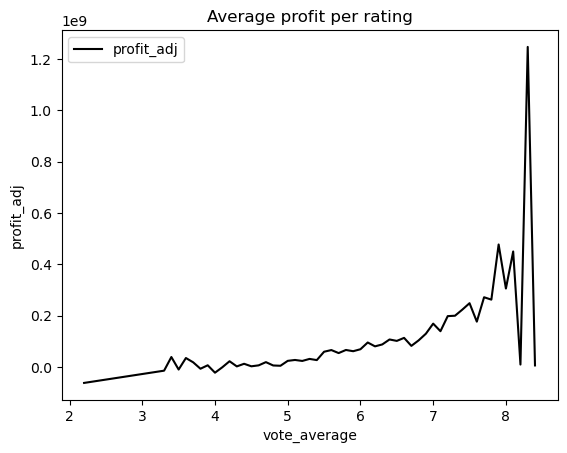

In [28]:
#Do highly rated movies record more profit?
va_profit = df_new.groupby(['vote_average'], as_index = False)['profit_adj'].mean()
va_profit.plot( x = 'vote_average', y = 'profit_adj', color = 'black');
plt.title('Average profit per rating')
plt.xlabel('vote_average')
plt.ylabel('profit_adj')

In [29]:
#how much vote did the highly rated movies get?
vote_avg_by_vote_count = df_new.groupby(['vote_average'], as_index = False)['vote_count'].mean()


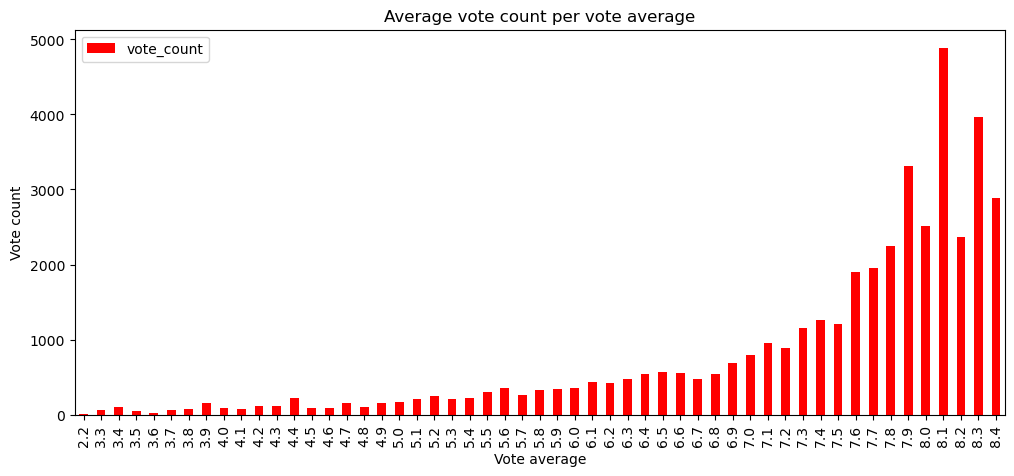

In [30]:
vote_avg_by_vote_count.plot(x='vote_average', y='vote_count', kind ='bar', color ='red', figsize=(12,5))
plt.title('Average vote count per vote average')
plt.xlabel('Vote average')
plt.ylabel('Vote count');


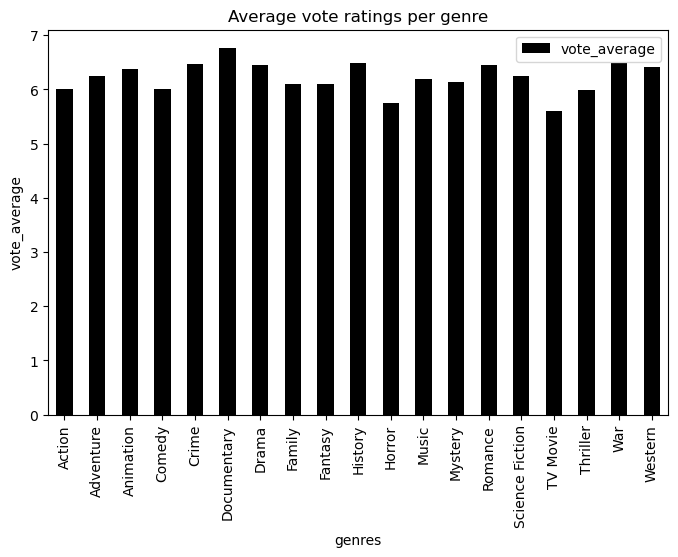

In [31]:
#What genres received the highest ratings?
genre_ratings = df_new.groupby(['genres 1'], as_index = False)['vote_average'].mean()
genre_ratings.plot(x='genres 1', y='vote_average', kind ='bar', color ='black', figsize=(8,5))
plt.title('Average vote ratings per genre')
plt.xlabel('genres')
plt.ylabel('vote_average');



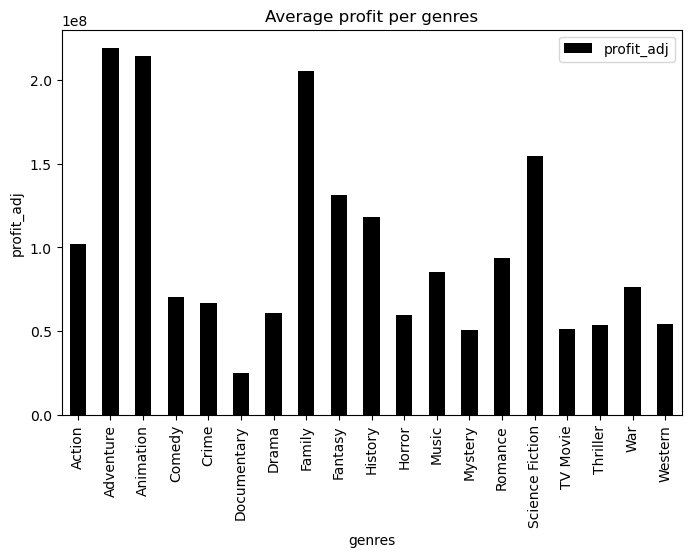

In [32]:
#What genres generated the most profit?  
genre_profit = df_new.groupby(['genres 1'], as_index = False)['profit_adj'].mean()
genre_profit.plot(x='genres 1', y='profit_adj', kind ='bar', color ='black', figsize=(8,5))
plt.title('Average profit per genres')
plt.xlabel('genres')
plt.ylabel('profit_adj');



In [33]:
#What kinds of properties are associated with movies that have high profit? 

In [34]:
#what is the definition of high profit? 
df_new['profit_adj'].describe()

count    3.805000e+03
mean     9.399617e+07
std      1.950332e+08
min     -4.139124e+08
25%     -1.420000e+06
50%      2.851334e+07
75%      1.090266e+08
max      2.750137e+09
Name: profit_adj, dtype: float64

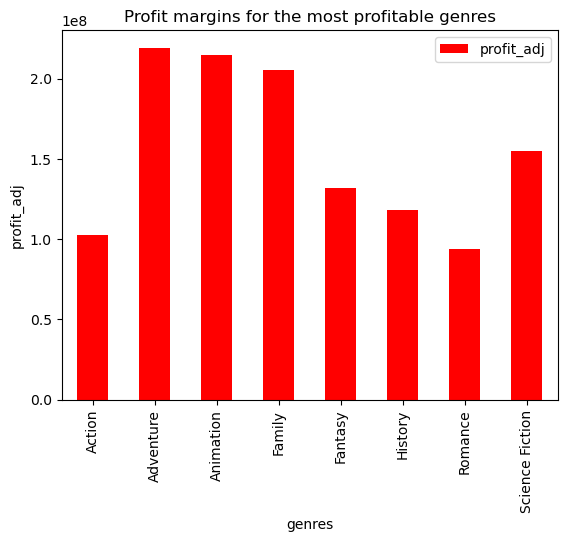

In [35]:
#profit_adj values >= 75 % will be classified as highly profitable
high_profit = df_new.query('profit_adj >=8.906076e+07')
#what genres have >= this profit margin?
x = df_new.groupby(['genres 1'], as_index = False)['profit_adj'].mean()
genre_by_high_profit = x[x['profit_adj'] >= 8.906076e+07]
genre_by_high_profit.plot(x= 'genres 1', y='profit_adj', kind='bar', color='red');
plt.title('Profit margins for the most profitable genres')
plt.xlabel('genres')
plt.ylabel('profit_adj');

In [36]:
genre_by_high_profit

,genres 1,profit_adj
0,Action,1.022587e+08
1,Adventure,2.193406e+08
2,Animation,2.146620e+08
7,Family,2.053924e+08
8,Fantasy,1.315806e+08
9,History,1.181293e+08
13,Romance,9.394149e+07
14,Science Fiction,1.546632e+08


In [37]:
#mean vote ratings for the most profitable movies. Here I am creating a new column with the vote average of these genres. vote raring is from vote_average column per listed genre
genre_by_high_profit['vote_rating'] = [6.0, 6.2, 6.4, 6.1, 6.1, 6.5, 6.4, 6.2]
genre_by_high_profit

/var/folders/t1/cbx5v0w15pg5ntkw6fpjrpnd85jgmq/T/ipykernel_64293/728083598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_by_high_profit['vote_rating'] = [6.0, 6.2, 6.4, 6.1, 6.1, 6.5, 6.4, 6.2]


,genres 1,profit_adj,vote_rating
0,Action,1.022587e+08,6.0
1,Adventure,2.193406e+08,6.2
2,Animation,2.146620e+08,6.4
7,Family,2.053924e+08,6.1
8,Fantasy,1.315806e+08,6.1
9,History,1.181293e+08,6.5
13,Romance,9.394149e+07,6.4
14,Science Fiction,1.546632e+08,6.2


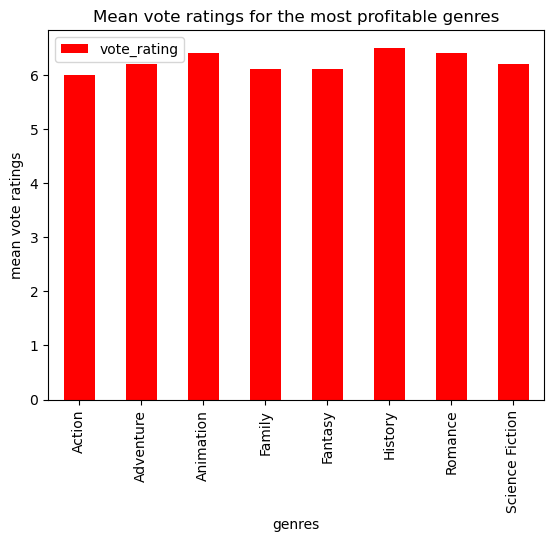

In [38]:
genre_by_high_profit.plot(x= 'genres 1', y='vote_rating', kind='bar', color='red');
plt.title('Mean vote ratings for the most profitable genres')
plt.xlabel('genres')
plt.ylabel('mean vote ratings');

In [39]:
#runtime for the most profitable movies
genre_by_high_profit['runtime'] = [110, 115, 90, 93, 104, 129, 107, 110]
genre_by_high_profit

/var/folders/t1/cbx5v0w15pg5ntkw6fpjrpnd85jgmq/T/ipykernel_64293/646779667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_by_high_profit['runtime'] = [110, 115, 90, 93, 104, 129, 107, 110]


,genres 1,profit_adj,vote_rating,runtime
0,Action,1.022587e+08,6.0,110
1,Adventure,2.193406e+08,6.2,115
2,Animation,2.146620e+08,6.4,90
7,Family,2.053924e+08,6.1,93
8,Fantasy,1.315806e+08,6.1,104
9,History,1.181293e+08,6.5,129
13,Romance,9.394149e+07,6.4,107
14,Science Fiction,1.546632e+08,6.2,110


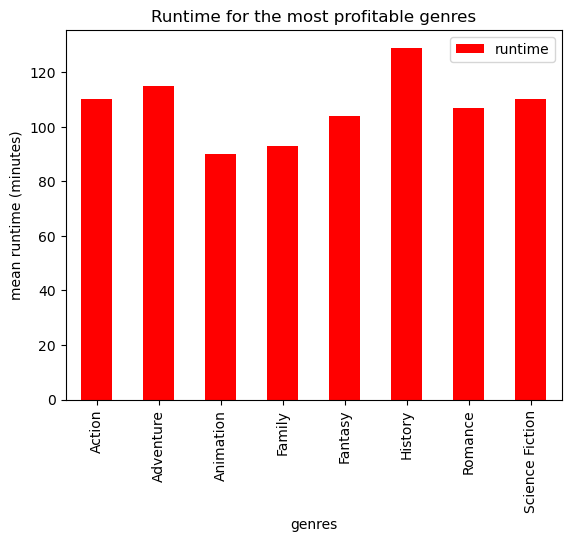

In [40]:
genre_by_high_profit.plot(x= 'genres 1', y='runtime', kind='bar', color='red');
plt.title('Runtime for the most profitable genres')
plt.xlabel('genres')
plt.ylabel('mean runtime (minutes)');

In [41]:
z = df_new.groupby(['genres 1'], as_index = False)['runtime'].mean()
z

,genres 1,runtime
0,Action,110.461988
1,Adventure,115.028846
2,Animation,90.465347
3,Comedy,102.170323
4,Crime,114.853801
5,Documentary,104.521739
6,Drama,117.900685
7,Family,93.475000
8,Fantasy,104.761468
9,History,129.294118


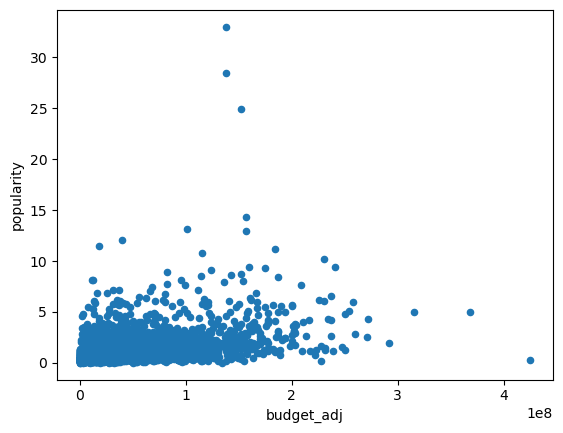

In [42]:
#What is the correlation between budget and popularity? Do movies which cost a ton gather high popularity?
df_new.plot(x='budget_adj', y = 'popularity', kind = 'scatter');


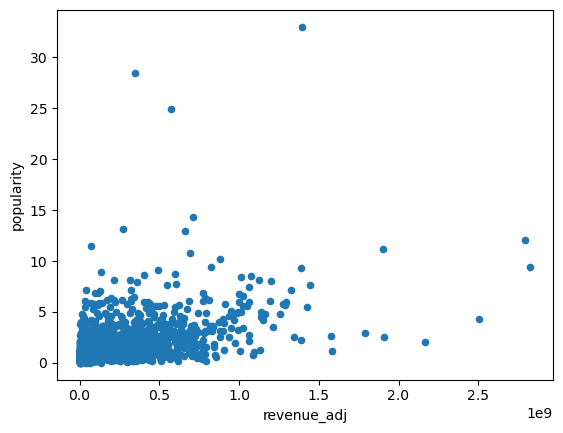

In [43]:
#What is the correlation between revenue and popularity?
df_new.plot(x='revenue_adj', y = 'popularity', kind = 'scatter');

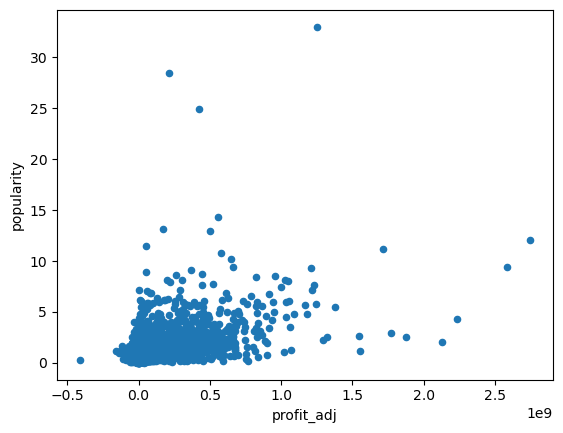

In [44]:
#What is the correlation between profit and popularity?
df_new.plot(x='profit_adj', y = 'popularity', kind = 'scatter');

In [45]:
df_new['budget_adj'].describe()

count    3.805000e+03
mean     4.471977e+07
std      4.488697e+07
min      9.693980e-01
25%      1.354637e+07
50%      3.038360e+07
75%      6.084153e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

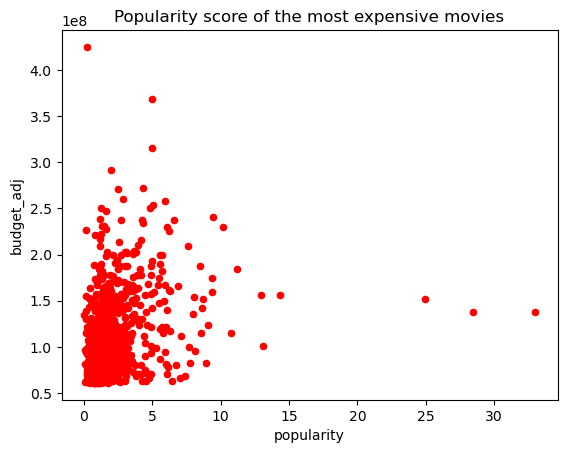

In [46]:
#values >= 75 % will be classified as high budget
high_profit = df_new.query('budget_adj >=6.084153e+07')
#what popularity is associated with movies in this budget range?
new = df_new.groupby(['popularity'], as_index = False)['budget_adj'].mean()
popularity_by_budget = new[new['budget_adj'] >= 6.084153e+07]
popularity_by_budget.plot(x= 'popularity', y='budget_adj', kind='scatter', color='red');
plt.title('Popularity score of the most expensive movies')
plt.show()

# Step 4: Conclusions/Findings



The first step taken in the analysis of this dataset was data cleaning which involved the removal of unnecssary columns, null values & duplicates, and creation of new columns. Upon further inspection, the columns containing adjusted revenue and budget were found to contain several zero values. Documentation found on kaggle revealed that these values were inputed as zeros because the details were not available. Therefore, it was decided to drop these values to make for reasonable analysis. 





1. Distribution of movies by genres and year
It was found that more movies have been released in recent years. There has been about 2000 % increase in the number of movies released between 1960 and 2015. This is shown in the histogram distribution of movies over the years. Also, the most popular genre seem to be Drama, closely followed by comedy.

2. Popularity of movies by month
No astonishing information was found by comparing the popularity of the movies released across the 12 calendar months. All movies released across the months seemed to receive nearly same popularity. 

3. Cost of movie production
Visualization of the trend of mean budget spent on movies per year reveal that it has not become particularly too expensive to make movies. In fact, movies released between 1960-1970 featured a very high production cost compared to those made between 2000-2015.

4. Vote average versus profit 
A plot of the mean profit realized per vote average shows that high voters rating correspond to high profit. Movies rated >=8.0 had the highest profit margin. Not surprisingly, the movies with vote average of >=8.0 also had the most vote count. This may mean that these movies had more viewers and that the viewers found the movies to be good across board. Also, more viewers may mean more profit.

5. Profit versus genres
The genres associated with the highest profits are: action, adventure, animation, family, fantasy, history, romance and science fiction. The mean profit margins for these genres is >= the 75th percentile of the profits generated per movie. These genres have similar ratings and runtime.

6. correlation of popularity with different element
There are no strong conclusions about the correlation of popularity with varying elements such as revenue, budget and vote average. 

These conclusions are subject to statistical tests and may not necessarily reflect the most accurate information that can be generated from this dataset. Some biases may have been inroduced in the analysis especially in the case of the genres coulumn which have different values separated by pipes. Only the genre with complete column values (genres 1) was used in the analysis and this may bias the results.



# References
1. Stack overflow. Retrieved from https://stackoverflow.com/
2. https://www.kaggle.com/code/rdrubbel/tmdb-finalb
3. J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.
4. McKinney, W., & others. (2010). Data structures for statistical computing in python. In Proceedings of the 9th Python in Science Conference (Vol. 445, pp. 51–56).